# 環境設置

## 安裝套件

In [ ]:
! pip install instagrapi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import re
from instagrapi import Client

ACCOUNT_USERNAME = "bbd._.26"
ACCOUNT_PASSWORD = "

cl = Client()
cl.login(ACCOUNT_USERNAME, ACCOUNT_PASSWORD)

True

In [ ]:
import json

In [ ]:
import re

## 定義函數

In [ ]:
#根據經緯度尋找地標(沒用到)
def search_location(lng, lat):
    locations = cl.location_search(lat, lng)
    for loc in locations:
        print(loc)
    return locations

In [ ]:
#尋找標籤
def tag_finder(tag):
  medias = cl.hashtag_medias_top(tag, amount=100)

  filtered_medias = []

  for media in medias:
    # Extract desired information
    filtered_data = {
        'pk': media.pk,
        'taken_at': media.taken_at,
        'media_type': media.media_type,
        'location': media.location,
        'like_count': media.like_count,
        'caption_text': media.caption_text,
        'title': media.title
    }
    # Append the dictionary to the filtered_medias list
    filtered_medias.append(filtered_data)

  # Now filtered_medias contains a list of dictionaries with the desired data

  df = pd.DataFrame(filtered_medias)

  loc_names = []
  for ind in range(0, len(df)):
      location = df['location'][ind]
      if location:
          loc_names.append(location.name)
      else:
          loc_names.append("")

  df['loc_name'] = loc_names
  return df

In [ ]:
pattern = r'\{(\d+\.\d+),\s*(\d+\.\d+)\}'
def extract_coordinates_re(text):
    match = re.findall(pattern, text)
    if match:
        return float(match[0][0]), float(match[0][1])
    else:
        return None, None

In [ ]:
def extract_coordinates(text):
    text = text.strip("{}")  # Remove curly braces
    lat, lon = text.split(",")
    return float(lat), float(lon)

In [ ]:
def remove_non_english(text):
  """去除文字中的非英文字母"""
  pattern = r'[^a-zA-Z]'  # 匹配所有非英文字母
  return re.sub(pattern, '', text)

# 假設 df_mrt_final 是您的 DataFrame


In [ ]:
#捷運站資料
station_list = [
    "松山機場", "中山國中", "南京復興", "忠孝復興", "大安", "科技大樓", "六張犁", "麟光", "辛亥", "萬芳醫院", "萬芳社區",
    "木柵", "動物園", "大直", "劍南路", "西湖", "港墘", "文德", "內湖", "大湖公園", "葫洲", "東湖", "南港軟體園區", "南港展覽館",
    "小碧潭", "新店", "新店區公所", "七張", "大坪林", "景美", "萬隆", "公館", "台電大樓", "古亭", "中正紀念堂", "小南門", "頂溪",
    "永安市場", "景安", "南勢角", "台大醫院", "台北車站", "中山", "雙連", "民權西路", "圓山", "劍潭", "士林", "芝山", "明德", "石牌",
    "唭哩岸", "奇岩", "北投", "新北投", "復興崗", "忠義", "關渡", "竹圍", "紅樹林", "淡水", "頂埔", "永寧", "土城", "海山", "亞東醫院",
    "府中", "板橋", "新埔", "江子翠", "龍山寺", "西門", "善導寺", "忠孝新生", "忠孝敦化", "國父紀念館", "市政府", "永春", "後山埤", "昆陽",
    "南港", "象山", "台北101", "信義安和", "大安森林公園", "北門", "松江南京", "台北小巨蛋", "南京三民", "松山", "輔大", "新莊", "頭前庄",
    "先嗇宮", "三重", "菜寮", "台北橋", "大橋頭", "中山國小", "行天宮", "東門", "蘆洲", "三民高中", "徐匯中學", "三和國中", "三重國小", "迴龍", "丹鳳"
]

# 以標籤搜尋地區美食

下面這段程式第一行可以輸入任何關鍵字，系統會回傳最相關的幾十筆資料

In [ ]:
food = tag_finder('台北夜市')
# 1. 移除 loc_name 為空的資料
food = food[food['loc_name'] != '']

# 2. 將 loc_name 相同的資料合併，like_count 相加
food_grouped = food.groupby('loc_name')['like_count'].sum().reset_index()

# 3. 篩選 like_count 大於等於 100 的資料
food_filtered = food_grouped[food_grouped['like_count'] >= 100]

food_sorted = food_filtered.sort_values(by='like_count', ascending=False)
print(food_sorted[['loc_name', 'like_count']])

                      loc_name  like_count
34                    橋頭客家純糖麻糬        7097
27                     景美上海生煎包        6001
55                       鴨頭正二代        4839
17                大橋頭延三夜市"現做蒸餃        4538
22                      寧夏觀光夜市        3651
16                      士林觀光夜巿        3296
26                   景美 張媽媽大雞排        3121
52                        饒河夜市        3000
32                      樂華觀光夜市        2749
43                     萬華阿義魯肉飯        2333
21                        寧夏夜市        2170
19                 好泰 Goodthai        1821
13                        士林夜市        1704
31                        樂華夜市        1688
56                       鴻記蔥餅捲        1687
39               臨江觀光夜市（通化街夜市）        1505
47                     通化街九份芋圓        1230
48                     通化街觀光夜市        1043
35                    永和樂華觀光夜巿         985
44               西門町 Ximenting         973
23                        山內雞肉         952
28                    景美楊家手工水餃         916
50         

下面的關鍵字是: 西湖美食

                                loc_name  like_count
4   KATZ Fusion Restaurant 卡司複合式餐廳 台北內湖店        5413
7             Stan Blue Coffee - 閃電・藍 咖啡        2983
18                                   雞吉君        2108
12                          好好食房 Soup Up        2063
16                            美川壽司mikawa        1526
20                         鳳華鶏豚濃湯拉麵專門 本店        1502
13             帝一 帝王蟹海鮮/黑毛牛/伊比利豬 頂級燒烤吃到飽         981
10                                千千的虎掌燒         729
19                  韓國料理裴老師家常飯 한국요리집밥배선생         607
9                                 五漁村丼飯屋         507
0                            AROS Coffee         501
2                  Ed's Diner 美式BBQ 燒烤餐館         367
15                                牛耳精緻麵館         355
6                              Poetry 如詩         198
8                          七號 CHi HAO 內湖         113


以不同捷運站為主題搜尋附近美食：

 七張
                 loc_name  like_count  \
29                  小樂精緻麵食館        1697   
7        墨啡商行MelFee Express        1396   
23            穩穩早餐店 Win-Win        1169   
5             穩穩早餐店 Win-Win         986   
0               小樂精緻麵食館-民權店         970   
25  Hiro's らぁ麵Kitchen 新北新店店         746   
20            老窗瞧瞧眨等/好孩子早餐店         635   
4                肉道場  繁盛居酒屋         632   
26          Peace&love cafe         592   
10                   賴家岡山羊肉         574   
14                      雨田+         555   
3     燒肉ChaCha 個人和牛燒肉 粉絲俱樂部         228   
24                  魚舞和食居酒屋         129   
21                                   43   
22                                   30   
11  家有璽事 排骨吐司 （吐司、茶飲、咖啡專賣店）          22   
12              伍饌道車輪餅-新店總店          12   
17                                   10   
6               伍饌道車輪餅-新店總店          10   
13                                    9   
15                                    6   
18                                    4   
19                   大戶屋新店店           3   
16                                    3   
1                 胡同裏燒肉 新店店           3   
2                      旭達豆漿           3   
9                 名門燒臘-伊通門市           3   
8                     原源牛肉麵           3   
27              牛燒肉yakiniku           3   
28                    阿喜豆釜堂           3   


                               loc_name  like_count
4   KATZ Fusion Restaurant 卡司複合式餐廳 台北內湖店        5413
7             Stan Blue Coffee - 閃電・藍 咖啡        2983
18                                   雞吉君        2108
12                          好好食房 Soup Up        2063
16                            美川壽司mikawa        1526
20                         鳳華鶏豚濃湯拉麵專門 本店        1502
13             帝一 帝王蟹海鮮/黑毛牛/伊比利豬 頂級燒烤吃到飽         981
10                                千千的虎掌燒         729
19                  韓國料理裴老師家常飯 한국요리집밥배선생         607
9                                 五漁村丼飯屋         507
0                            AROS Coffee         501
2                  Ed's Diner 美式BBQ 燒烤餐館         367
15                                牛耳精緻麵館         355
6                              Poetry 如詩         198
8                          七號 CHi HAO 內湖         113

六張犁

                       loc_name  like_count
4    Mountain Kids Chill & Relax        4160
5                          THE．春        3571
16                          明月湯包        2311
26                           老咖哩        2127
30  週末炸雞俱樂部 Weekend Chicken Club        2096
18                   永和樓-韓式中華料理店        2074
8                           井上禾食        1747
21           片山西點 Mountain Piece        1428
13                          崇灯拉麵        1418
27                     老宋記真善美牛肉麵        1392
11                          午冬甜點        1333
17                  柑橘Shinn - 鴨蔥        1283
29                軟食力 Soft Power        1023
19            清山寶珠．人味誠茶 Honestea         808
6        WUnique Pâtisserie 法式甜點         801
9                 休習日 Z Day Cafe         747
2                   Foliage cafe         672
22                         神樂坂割烹         667
3                 Fuji Curry富士咖哩         664
24               紅火食代 串燒專門店（安居店）         621
28            舒適圈 · Comfort Zone         619
12                         原 鮨割烹         444
15                        捷運六張犁站         253


迴龍
10                            新莊區        6854
13    朋月栻-韓雞雞•江原道-宗음식《含吃一隻雞》新莊創始店        3964
14  林椐 Neighborhood Coffee Studio        3116
18                       迴龍2.5元水餃        1443
9                           新國粉圓冰         686
3           Reversion cafe_反轉點•咖啡         476
12                            有點早         400
4                     享食EnjoyFood         270
17                          豬肚雞火鍋         187
8                       斗南米糕甲-新莊店         175
20                     魯肉發 無刺虱目魚粥         143
1                 De l'espoir手在餐桌         112
6                          哞哞手作甜點         102
0                A&J Brunch_燕覺 早午         101

木柵
                            loc_name  like_count
15                               木柵製冰所       13482
4                Ruins Coffee Roasters       10991
5   Schumann's Bistro No. 6 舒曼六號餐館 南京店        6529
22               貓空威叔茶莊 UNCLE WELL TEA        5789
8                                  你後面        3616
23                                  麵妃        2470
20                          葉普利麻辣鴨血臭豆腐        2186
13                           政治大學達賢圖書館        1374
18                           生活在他方-夜貓店        1277
14                               木柵捷運站        1127
3                 Purrson Bistro 呼嚕小酒館         947
2                 Juicy Bun Burger 政大店         680
16               李白 Breakfast x Coffee         595
21                             貓空Cafe巷         433


# 比較捷運站美食標籤數量

此段程式是以捷運站＋美食為關鍵字，搜尋各站的貼文數多寡，比如說松山機場７９７代表＂松山機場美食＂這個標籤共有７９７筆貼文，理論上越多代表這裡是美食天堂，越少代表是美食沙漠

In [ ]:
df_sta_count = pd.DataFrame(columns=['station', 'count'])

for tag in station_list:
    sta_hashtag = cl.hashtag_info(tag + "美食")
    new_row = pd.DataFrame({'station': [tag], 'count': [sta_hashtag.media_count]})
    df_sta_count = pd.concat([df_sta_count, new_row], ignore_index=True)

print(df_sta_count)



    station  count
0      松山機場    797
1      中山國中   4062
2      南京復興  36900
3      忠孝復興  47669
4        大安  75066
..      ...    ...
103    徐匯中學   1429
104    三和國中    328
105    三重國小   1146
106      迴龍   1699
107      丹鳳   1691

[108 rows x 2 columns]


將捷運站依照貼文數高至低排列，最多的幾個通常都是以行政區命名的捷運站（會搜到除了捷運站附近外的貼文），另外忠義、萬芳社區是ｉｇ認證的美食沙漠

In [ ]:
# 按照 'count' 欄位降序排序 (若要升序，將 ascending=False 改為 ascending=True)
df_sorted = df_sta_count.sort_values(by='count', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 印出 DataFrame
print(df_sorted)

    station   count
67       板橋  254394
42       中山  134111
91       新莊  102462
94       三重   99263
18       內湖   90198
60       淡水   79716
4        大安   75066
47       士林   72177
71       西門   67480
31       公館   62961
75    國父紀念館   56015
25       新店   55381
101      蘆洲   48814
3      忠孝復興   47669
74     忠孝敦化   47536
89       松山   40832
66       府中   39271
76      市政府   38894
2      南京復興   36900
99      行天宮   34786
43       雙連   33045
53       北投   32869
86     松江南京   30406
41     台北車站   29793
80       南港   29010
83     信義安和   28401
13       大直   27618
100      東門   25959
63       土城   25370
6       六張犁   21100
68       新埔   19883
33       古亭   19145
72      善導寺   16869
69      江子翠   16170
73     忠孝新生   16131
32     台電大樓   14543
11       木柵   13587
90       輔大   12862
34    中正紀念堂   12350
88     南京三民   12130
50       石牌   11975
5      科技大樓   11750
29       景美   10481
36       頂溪   10455
70      龍山寺   10078
21       東湖    8815
30       萬隆    8402
28      大坪林    8211
77       永春    8148


In [ ]:
# 假設你的 JSON 檔案名稱為 data.json
with open('mrt.json', 'r') as f:
  data = json.load(f)

# 顯示讀取的資料
print(data)

df_mrt = pd.DataFrame(data)

[{'SEQNO': '1', 'StationID': "'BR01'", 'StationName': "'{動物園,Taipei Zoo}'", 'StationPosition': "'{121.579501,24.998205}'", 'StationAddress': "'11656臺北市文山區新光路2段32號'", 'BikeAllowOnHoliday': '0', 'UpdateTime': '20170525'}, {'SEQNO': '2', 'StationID': "'BR02'", 'StationName': "'{木柵,Muzha}'", 'StationPosition': "'{121.573127,24.99824}'", 'StationAddress': "'11656臺北市文山區木柵路4段135號'", 'BikeAllowOnHoliday': '0', 'UpdateTime': '20170525'}, {'SEQNO': '3', 'StationID': "'BR03'", 'StationName': "'{萬芳社區,Wanfang Community}'", 'StationPosition': "'{121.568088,24.99857}'", 'StationAddress': "'11653臺北市文山區萬芳路60號'", 'BikeAllowOnHoliday': '0', 'UpdateTime': '20170525'}, {'SEQNO': '4', 'StationID': "'BR04'", 'StationName': "'{萬芳醫院,Wanfang Hospital}'", 'StationPosition': "'{121.558092,24.99932}'", 'StationAddress': "'11696臺北市文山區興隆路3段113號'", 'BikeAllowOnHoliday': '0', 'UpdateTime': '20170525'}, {'SEQNO': '5', 'StationID': "'BR05'", 'StationName': "'{辛亥,Xinhai}'", 'StationPosition': "'{121.5570455,25.005455}'",

In [ ]:
print(df_mrt["StationName"])

0                              '{動物園,Taipei Zoo}'
1                                    '{木柵,Muzha}'
2                      '{萬芳社區,Wanfang Community}'
3                       '{萬芳醫院,Wanfang Hospital}'
4                                   '{辛亥,Xinhai}'
5                                 '{麟光,Linguang}'
6                              '{六張犁,Liuzhangli}'
7                    '{科技大樓,Technology Building}'
8                                     '{大安,Daan}'
9                       '{忠孝復興,Zhongxiao Fuxing}'
10          '{中山國中,Zhongshan Junior High School}'
11                      '{松山機場,Songshan Airport}'
12                                   '{大直,Dazhi}'
13                            '{劍南路,Jiannan Rd.}'
14                                    '{西湖,Xihu}'
15                                '{港墘,Gangqian}'
16                                   '{文德,Wende}'
17                                   '{內湖,Neihu}'
18                             '{大湖公園,Dahu Park}'
19                                  '{葫洲,Huzhou}'


In [ ]:
df_mrt['站名'] = df_mrt['StationName'].apply(extract_station_name)
df_mrt['站名'][25] = '台北101'
print(df_mrt['站名'])

0         動物園
1          木柵
2        萬芳社區
3        萬芳醫院
4          辛亥
5          麟光
6         六張犁
7        科技大樓
8          大安
9        忠孝復興
10       中山國中
11       松山機場
12         大直
13        劍南路
14         西湖
15         港墘
16         文德
17         內湖
18       大湖公園
19         葫洲
20         東湖
21     南港軟體園區
22      南港展覽館
23      南港展覽館
24         象山
25      台北101
26       信義安和
27     大安森林公園
28         東門
29      中正紀念堂
30       台大醫院
31       台北車站
32         中山
33         雙連
34       民權西路
35         圓山
36         劍潭
37         士林
38         芝山
39         明德
40         石牌
41        唭哩岸
42         奇岩
43         北投
44        新北投
45        復興崗
46         忠義
47         關渡
48         竹圍
49        紅樹林
50         淡水
51         新店
52      新店區公所
53         七張
54        小碧潭
55        大坪林
56         景美
57         萬隆
58         公館
59       台電大樓
60         古亭
61        小南門
62         北門
63       松江南京
64       南京復興
65      台北小巨蛋
66       南京三民
67         松山
68        南勢角
69         景安
70       永安市場
71    

<ipython-input-201-7cef1786f41a>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_mrt['站名'][25] = '台北101'


In [ ]:
df_mrt2 = df_mrt[['StationPosition', '站名','StationID']]
df_mrt2 = df_mrt2.rename(columns={'站名': 'station'})
df_mrt_final = pd.merge(df_sta_count, df_mrt2, on='station')
print(df_mrt_final)

    station   count             StationPosition    StationID
0      松山機場     797    '{121.55201,25.0629075}'       'BR13'
1      中山國中    4062     '{121.544215,25.06085}'       'BR12'
2      南京復興   36900    '{121.544303,25.052044}'   'G16,BR11'
3      忠孝復興   47669    '{121.545026,25.041749}'  'BR10,BL15'
4        大安   75066     '{121.54237,25.033311}'   'BR09,R05'
5      科技大樓   11750    '{121.5434615,25.02612}'       'BR08'
6       六張犁   21100      '{121.55302,25.02381}'       'BR07'
7        麟光     670   '{121.5588335,25.018495}'       'BR06'
8        辛亥     135   '{121.5570455,25.005455}'       'BR05'
9      萬芳醫院    1316     '{121.558092,24.99932}'       'BR04'
10     萬芳社區      21     '{121.568088,24.99857}'       'BR03'
11       木柵   13587     '{121.573127,24.99824}'       'BR02'
12      動物園     919    '{121.579501,24.998205}'       'BR01'
13       大直   27618      '{121.54679,25.07943}'       'BR14'
14      劍南路     822    '{121.5555825,25.08483}'       'BR15'
15       西湖    4511     

In [ ]:
df_mrt_final['StationID'] = df_mrt_final['StationID'].apply(remove_non_english)
df_mrt_final[['longitude', 'latitude']] = df_mrt_final['StationPosition'].apply(extract_coordinates_re).apply(pd.Series)
df_mrt_final['count'] = df_mrt_final['count'].astype(int)
df_mrt_final['StationID'] = df_mrt_final['StationID'].astype(str)
print(df_mrt_final)

0        BR
1        BR
2       GBR
3      BRBL
4       BRR
5        BR
6        BR
7        BR
8        BR
9        BR
10       BR
11       BR
12       BR
13       BR
14       BR
15       BR
16       BR
17       BR
18       BR
19       BR
20       BR
21       BR
22       BR
23       BR
24       BL
25       GA
26        G
27        G
28        G
29        G
30        G
31        G
32        G
33        G
34       GO
35       RG
36        G
37        O
38        O
39        O
40        O
41        R
42      RBL
43       RG
44        R
45       RO
46        R
47        R
48        R
49        R
50        R
51        R
52        R
53        R
54        R
55       RA
56        R
57        R
58        R
59        R
60        R
61        R
62       BL
63       BL
64       BL
65       BL
66       BL
67       BL
68       BL
69       BL
70       BL
71       BL
72      BLG
73       BL
74      BLO
75       BL
76       BL
77       BL
78       BL
79       BL
80       BL
81       BL
82        R
83  

下面這張圖結合了捷運站的站位資訊，以圓圈大小當作貼文數量繪製地圖

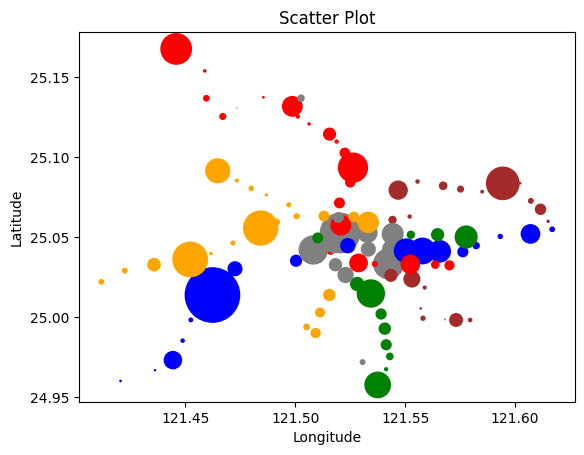

In [ ]:
color_dict = {'R': 'red', 'G': 'green', 'BL': 'blue', 'BR': 'brown', 'O': 'orange', '_': 'black'}
colors = [color_dict.get(sid, 'gray') for sid in df_mrt_final['StationID']]

x = df_mrt_final['longitude']
y = df_mrt_final['latitude']
z = df_mrt_final['count']
# use the scatter function
plt.scatter(x, y, s=z*0.006,c=colors)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot')
plt.show()

# 比較捷運站打卡數


主題從捷運站附近的美食改成捷運站本身，但概念基本上一樣，標籤改為＂捷運＊＊＊站＂，松山機場３６６就代表＂捷運松山機場站＂這個標籤有３６６則˙貼文，所以理論上數量越多代表這個車站越好玩，越少代表月無聊

In [ ]:
df_sta_count2 = pd.DataFrame(columns=['station', 'count'])

for tag in station_list:
    sta_hashtag = cl.hashtag_info("捷運" + tag + "站")
    new_row = pd.DataFrame({'station': [tag], 'count': [sta_hashtag.media_count]})
    df_sta_count2 = pd.concat([df_sta_count2, new_row], ignore_index=True)

print(df_sta_count2)

    station  count
0      松山機場    366
1      中山國中   3336
2      南京復興   5400
3      忠孝復興  11013
4        大安   8531
5      科技大樓   2475
6       六張犁   4138
7        麟光   1821
8        辛亥    990
9      萬芳醫院   1769
10     萬芳社區    103
11       木柵    359
12      動物園    520
13       大直   1767
14      劍南路   2486
15       西湖   3566
16       港墘   3867
17       文德   2227
18       內湖   6325
19     大湖公園    342
20       葫洲   1301
21       東湖   1641
22   南港軟體園區    207
23    南港展覽館   4085
24      小碧潭    419
25       新店   1265
26    新店區公所   1078
27       七張   3184
28      大坪林   1877
29       景美   1447
30       萬隆   1217
31       公館   6656
32     台電大樓   4561
33       古亭   3970
34    中正紀念堂   1623
35      小南門    789
36       頂溪   4299
37     永安市場   2382
38       景安   2567
39      南勢角   1214
40     台大醫院    635
41     台北車站     99
42       中山  56696
43       雙連   7984
44     民權西路   3454
45       圓山   3707
46       劍潭   3604
47       士林   3482
48       芝山   5402
49       明德   1766
50       石牌   1171
51      唭哩岸 

In [ ]:
sta_hashtag = cl.hashtag_info("捷運" + "台北車站")
df_sta_count2.loc[41, "station"] = '台北車站'
df_sta_count2.loc[41, "count"] = sta_hashtag.media_count


中山的打卡數遠遠領先，萬芳社區一樣荒涼

In [ ]:
# 按照 'count' 欄位降序排序 (若要升序，將 ascending=False 改為 ascending=True)
df_sorted2 = df_sta_count2.sort_values(by='count', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 印出 DataFrame
print(df_sorted2)

    station  count
42       中山  56696
100      東門  13875
3      忠孝復興  11013
71       西門  10472
76      市政府  10331
66       府中   9227
68       新埔   9178
4        大安   8531
43       雙連   7984
74     忠孝敦化   7144
31       公館   6656
99      行天宮   6596
18       內湖   6325
86     松江南京   5988
90       輔大   5747
41     台北車站   5653
64       海山   5415
75    國父紀念館   5414
48       芝山   5402
2      南京復興   5400
67       板橋   4960
88     南京三民   4835
83     信義安和   4640
94       三重   4598
32     台電大樓   4561
98     中山國小   4533
36       頂溪   4299
91       新莊   4181
6       六張犁   4138
23    南港展覽館   4085
33       古亭   3970
16       港墘   3867
85       北門   3734
45       圓山   3707
46       劍潭   3604
15       西湖   3566
47       士林   3482
77       永春   3461
44     民權西路   3454
1      中山國中   3336
27       七張   3184
95       菜寮   3134
73     忠孝新生   2979
97      大橋頭   2837
96      台北橋   2733
79       昆陽   2604
60       淡水   2576
38       景安   2567
89       松山   2507
14      劍南路   2486
5      科技大樓   2475
37     永安市場 

In [ ]:
df_mrt_final2 = pd.merge(df_sta_count2, df_mrt2, on='station')
print(df_mrt_final)

    station   count             StationPosition StationID   longitude  \
0      松山機場     797    '{121.55201,25.0629075}'        BR  121.552010   
1      中山國中    4062     '{121.544215,25.06085}'        BR  121.544215   
2      南京復興   36900    '{121.544303,25.052044}'       GBR  121.544303   
3      忠孝復興   47669    '{121.545026,25.041749}'      BRBL  121.545026   
4        大安   75066     '{121.54237,25.033311}'       BRR  121.542370   
5      科技大樓   11750    '{121.5434615,25.02612}'        BR  121.543462   
6       六張犁   21100      '{121.55302,25.02381}'        BR  121.553020   
7        麟光     670   '{121.5588335,25.018495}'        BR  121.558834   
8        辛亥     135   '{121.5570455,25.005455}'        BR  121.557046   
9      萬芳醫院    1316     '{121.558092,24.99932}'        BR  121.558092   
10     萬芳社區      21     '{121.568088,24.99857}'        BR  121.568088   
11       木柵   13587     '{121.573127,24.99824}'        BR  121.573127   
12      動物園     919    '{121.579501,24.998205}'    

In [ ]:
df_mrt_final2['StationID'] = df_mrt_final2['StationID'].apply(remove_non_english)
df_mrt_final2[['longitude', 'latitude']] = df_mrt_final2['StationPosition'].apply(extract_coordinates_re).apply(pd.Series)
df_mrt_final2['count'] = df_mrt_final2['count'].astype(int)
df_mrt_final2['StationID'] = df_mrt_final2['StationID'].astype(str)
print(df_mrt_final2)

    station  count             StationPosition StationID   longitude  \
0      松山機場    366    '{121.55201,25.0629075}'        BR  121.552010   
1      中山國中   3336     '{121.544215,25.06085}'        BR  121.544215   
2      南京復興   5400    '{121.544303,25.052044}'       GBR  121.544303   
3      忠孝復興  11013    '{121.545026,25.041749}'      BRBL  121.545026   
4        大安   8531     '{121.54237,25.033311}'       BRR  121.542370   
5      科技大樓   2475    '{121.5434615,25.02612}'        BR  121.543462   
6       六張犁   4138      '{121.55302,25.02381}'        BR  121.553020   
7        麟光   1821   '{121.5588335,25.018495}'        BR  121.558834   
8        辛亥    990   '{121.5570455,25.005455}'        BR  121.557046   
9      萬芳醫院   1769     '{121.558092,24.99932}'        BR  121.558092   
10     萬芳社區    103     '{121.568088,24.99857}'        BR  121.568088   
11       木柵    359     '{121.573127,24.99824}'        BR  121.573127   
12      動物園    520    '{121.579501,24.998205}'        BR  121.57

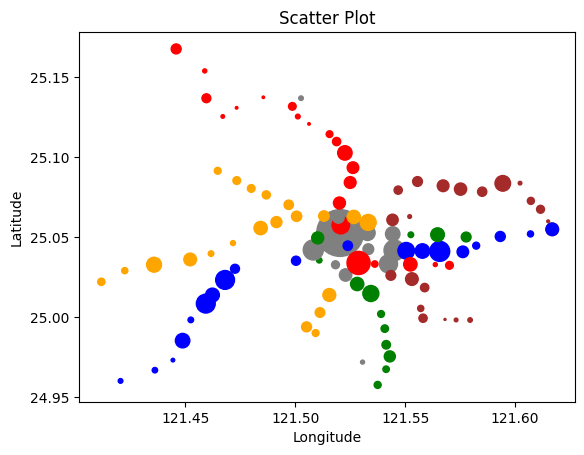

In [ ]:
colors = [color_dict.get(sid, 'gray') for sid in df_mrt_final2['StationID']]

x = df_mrt_final2['longitude']
y = df_mrt_final2['latitude']
z = df_mrt_final2['count']
# use the scatter function
plt.scatter(x, y, s=z*0.02,c=colors)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot')
plt.show()